# ARESD
#### Par Lina Bourenane, Yuva Djebra et Victor Ji

#### Analyse descriptive, régression linéaire, classification supervisée, analyse des résidus, tests statistiques, prévision, validation croisée


## Chargement des données

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

donnees = pd.read_csv('train.csv')
msk = np.random.rand(len(donnees)) < 0.70
train = donnees[msk].copy()
test = donnees[~msk].copy()
benchmark= pd.read_csv('prev.csv')

In [233]:
donnees

,DateTime,MixProdElec,EmissionCO2,PositionDansAnnee,Annee,Mois,DemiHeure,Jour,JourFerie,JourFerieType,VacancesZoneA,VacancesZoneB,VacancesZoneC,Temperature,Nebulosity,Humidity,WindSpeed,Precipitation,JourFerieType_encodé,JourFerieType_encodée
0,2016-01-01 00:00:00,Normal,932.5575,0.000000,2016,janvier,0,vendredi,True,1janvier,True,True,True,6.470270,88.761905,91.216216,2.264865,-0.013514,3,3
1,2016-01-01 00:30:00,Normal,912.7485,0.000057,2016,janvier,1,vendredi,True,1janvier,True,True,True,6.324798,88.557998,91.466505,2.226276,-0.010407,3,3
2,2016-01-01 01:00:00,Normal,906.8480,0.000114,2016,janvier,2,vendredi,True,1janvier,True,True,True,6.179325,88.354090,91.716794,2.187688,-0.007300,3,3
3,2016-01-01 01:30:00,Normal,903.3600,0.000171,2016,janvier,3,vendredi,True,1janvier,True,True,True,6.033853,88.150183,91.967082,2.149099,-0.004193,3,3
4,2016-01-01 02:00:00,Normal,892.4800,0.000228,2016,janvier,4,vendredi,True,1janvier,True,True,True,5.888381,87.946276,92.217371,2.110511,-0.001086,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95980,2023-06-22 14:30:00,Decarbonne,652.9410,0.472915,2023,juin,29,jeudi,False,nonFerie,False,False,False,22.633165,88.472540,70.461876,4.740994,1.225101,9,9
95981,2023-06-22 15:00:00,Decarbonne,646.9470,0.472972,2023,juin,30,jeudi,False,nonFerie,False,False,False,22.692105,89.210526,69.815789,4.807692,0.994737,9,9
95982,2023-06-22 15:30:00,Decarbonne,661.9340,0.473029,2023,juin,31,jeudi,False,nonFerie,False,False,False,22.692105,89.210526,69.815789,4.807692,0.994737,9,9
95983,2023-06-22 16:00:00,Decarbonne,701.6100,0.473086,2023,juin,32,jeudi,False,nonFerie,False,False,False,22.692105,89.210526,69.815789,4.807692,0.994737,9,9


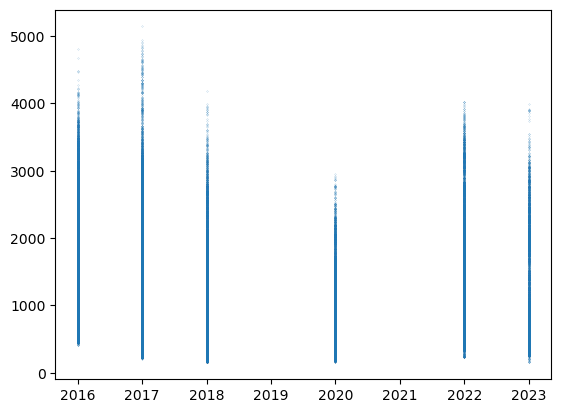

In [101]:
def fig_nuage(x,y):
    return plt.scatter(x,y,s=0.01)

a=train["EmissionCO2"]
b=train["Annee"]

fig_nuage(b,a)


## Vérification des valeurs manquantes

In [74]:
valeurs_manquantes= donnees.isnull().sum()
valeurs_manquantes

DateTime             0
MixProdElec          0
EmissionCO2          0
PositionDansAnnee    0
Annee                0
Mois                 0
DemiHeure            0
Jour                 0
JourFerie            0
JourFerieType        0
VacancesZoneA        0
VacancesZoneB        0
VacancesZoneC        0
Temperature          0
Nebulosity           0
Humidity             0
WindSpeed            0
Precipitation        0
dtype: int64

# Loi jointe

In [76]:
data = pd.read_csv('train.csv')
msk=np.random.rand(len(data)) < 0.70
train = data[msk]
test  = data[~msk]
prev = pd.read_csv('prev.csv')

def loi_jointe(tab, a, b):
    y = tab[a].unique()
    
    x = tab[b].unique()
    pxy = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            pxy[i, j] = np.mean((tab[a] == y[i]) & (tab[b] == x[j]))
    return pxy

def loi_jointe2(tab, a, b, c):
    y = tab[a].unique()
    x = tab[b].unique()
    z = tab[c].unique()
    pxyz = np.zeros((len(y), len(x), len(z)))
    for i in range(len(y)):
        for j in range(len(x)):
            for k in range(len(z)):
                pxyz[i, j, k] = np.mean((tab[a] == y[i]) & (tab[b] == x[j]) & (tab[c] == z[k]))
    return pxyz

# Classificateur Bayes

In [78]:
def class_bayes(tab,y,x,x_test):
    prev=[]
    pxy = loi_jointe(tab, y, x)
    unique_values = tab[x].unique()
    unique_values_Y=tab[y].unique()
    
    for val in x_test[x] : 
              index = np.where(unique_values == val)[0][0]
              
              prev.append(unique_values_Y[np.argmax(pxy[:,index])])
    return prev
pre_v=class_bayes(train,"MixProdElec","Mois",test)
def ARE(prev,true,v="MixProdElec"):
    return 100*(prev == true[v].reset_index(drop=True)).mean()

print("Score=",ARE(pre_v, test, v="MixProdElec"))

Score= 57.55107723365006


#### Score Kaagle sur l'ensemble des données 54,537

# Classificateur Bayes naif

In [80]:
def bayes_naif(tab, y, x1, x2, x_test):
    prev = []
    pxy = loi_jointe2(tab, y, x1, x2)
    
    unique_values_x1 = tab[x1].unique()
    unique_values_x2 = tab[x2].unique()
    unique_values_Y = tab[y].unique()

    for index, row in x_test.iterrows():
        val_x1 = row[x1]
        val_x2 = row[x2]
        index1 = np.where(unique_values_x1 == val_x1)[0][0]
        index2 = np.where(unique_values_x2 == val_x2)[0][0]

        prev.append(unique_values_Y[np.argmax(pxy[:, index1, index2])])

    return prev
prev = bayes_naif(train,"MixProdElec","Mois","Jour",test)

def ARE(prev,true,v="MixProdElec"):
    return 100*(prev == true[v].reset_index(drop=True)).mean()

print("Score=",ARE(prev, test, v="MixProdElec"))

Score= 61.36577216247259


#### Score Kaagle sur l'ensemble des données 55,022

# KNN

#### Chargement des données de référencers_num)

In [14]:
benchmark= pd.read_csv('prev.csv')

#### Identification des classes uniques dans la colonne 'MixProdElec' de l'ensemble d'entraînement

In [16]:
classes_uniques = train['MixProdElec'].unique()

#### Création d'un dictionnaire pour mapper les noms des classes à un code numérique

In [21]:
classe_vers_num = {cle: valeur for valeur, cle in enumerate(classes_uniques)}

#### Application de ce mapping pour transformer les noms des classes en codes

In [24]:
train['MixProdElec_code'] = train['MixProdElec'].map(classe_vers_num)

#### Définition d'une fonction pour encoder des étiquettes de manière numérique

In [27]:
def label_encoder(vecteur_caracteristiques):
    _,encoded_labels= np.unique(vecteur_caracteristiques,return_inverse=True)
    return encoded_labels

#### Encodage des caractéristiques de l'ensemble d'entraînement


In [29]:
train['JourFerie_encodé'] = label_encoder(train["JourFerie"])
train['JourFerieType_encodé'] = label_encoder(train["JourFerieType"])
train['VacancesZoneA_encodé'] = label_encoder(train["VacancesZoneA"])
train['VacancesZoneB_encodé'] = label_encoder(train["VacancesZoneB"])
train['VacancesZoneC_encodé'] = label_encoder(train["VacancesZoneC"])

#### Analyse et Visualisation des Fréquences des Variables Encodées dans les Données

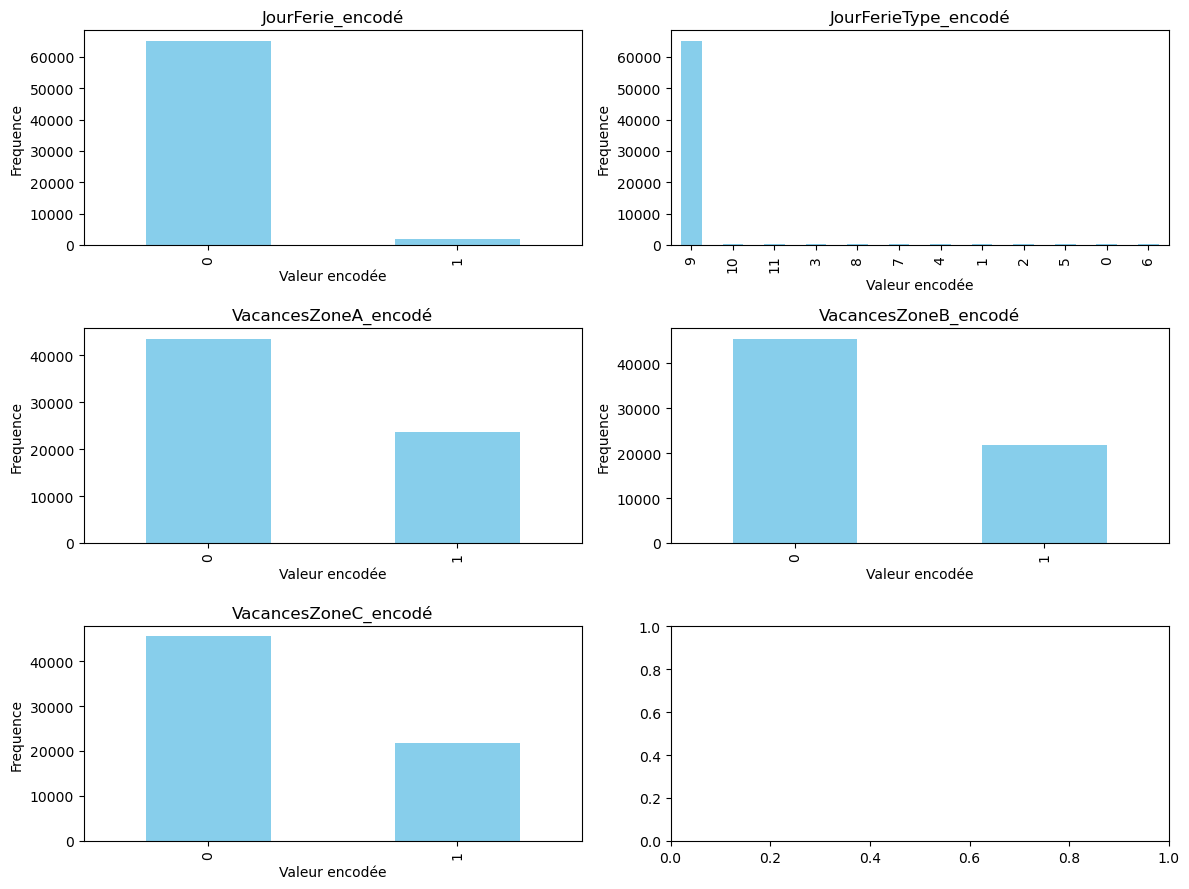

JourFerieType_encodé
9     65242
10      211
11      201
3       199
8       196
7       189
4       186
1       177
2       176
5       175
0       173
6       163
Name: count, dtype: int64


In [32]:
fig, axs = plt.subplots(3, 2, figsize=(12, 9))
axs = axs.flatten()

variables = ['JourFerie_encodé', 'JourFerieType_encodé', 'VacancesZoneA_encodé', 'VacancesZoneB_encodé', 'VacancesZoneC_encodé']
for i, var in enumerate(variables):
    train[var].value_counts().plot(kind='bar', ax=axs[i], title=var, color='skyblue')
    axs[i].set_ylabel('Frequence')
    axs[i].set_xlabel('Valeur encodée')

plt.tight_layout()
plt.show()
print(train['JourFerieType_encodé'].value_counts())


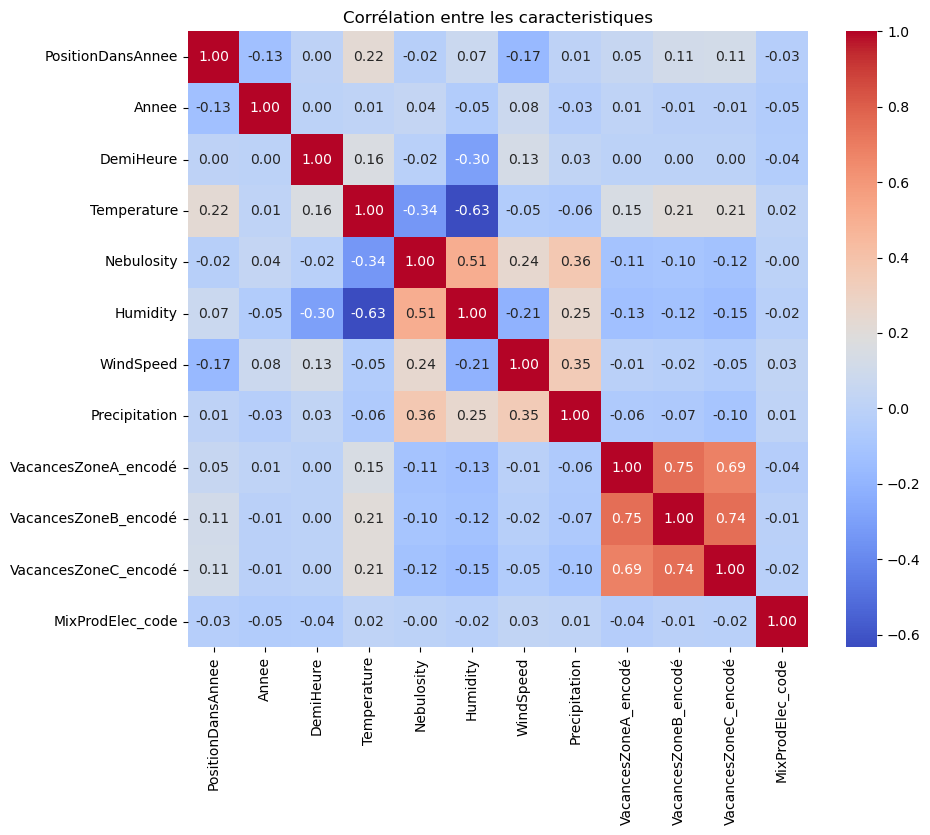

In [72]:
import seaborn as sns

def plot_correlation_matrix(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Corrélation entre les caracteristiques')
    plt.show()

plot_correlation_matrix(train[caracteristiques + ['MixProdElec_code']])


#### Encodage au jeu de données benchmark

In [35]:
benchmark['JourFerie_encodé'] = label_encoder(benchmark["JourFerie"])
benchmark['JourFerieType_encodé'] = label_encoder(benchmark["JourFerieType"])
benchmark['VacancesZoneA_encodé'] = label_encoder(benchmark["VacancesZoneA"])
benchmark['VacancesZoneB_encodé'] = label_encoder(benchmark["VacancesZoneB"])
benchmark['VacancesZoneC_encodé'] = label_encoder(benchmark["VacancesZoneC"])

#### Sélection des caractéristiques numériques pour l'entraînement, à l'exception de certaines spécifiées

In [77]:
caracteristiques = train.select_dtypes(include=[np.number]).columns.tolist()
#caracteristiques.remove('VacancesZoneC_encodé')
#caracteristiques.remove('VacancesZoneA_encodé')
#caracteristiques.remove('VacancesZoneB_encodé')
#caracteristiques.remove('Jour_encodé')
#caracteristiques.remove('Mois_encodé')
caracteristiques.remove('MixProdElec_code')
caracteristiques.remove('EmissionCO2')
caracteristiques.remove('JourFerie_encodé')
caracteristiques.remove('JourFerieType_encodé')
print(caracteristiques)


['PositionDansAnnee', 'Annee', 'DemiHeure', 'Temperature', 'Nebulosity', 'Humidity', 'WindSpeed', 'Precipitation', 'VacancesZoneA_encodé', 'VacancesZoneB_encodé', 'VacancesZoneC_encodé']


#### Extraction des valeurs pour l'entraînement et les cibles


In [95]:
X_entrainement = train[caracteristiques].values
y_entrainement = train['MixProdElec_code'].values
X_benchmark = benchmark[caracteristiques].values


#### Normalisation des données

In [58]:
moyenne = np.mean(X_entrainement, axis=0)
ecart_type = np.std(X_entrainement, axis=0)
X_entrainement_normalise = (X_entrainement - moyenne) / ecart_type
X_test_normalise = (X_benchmark - moyenne) / ecart_type

#### Définition du modèle Knn

In [61]:
def knn(X_entrain, y_entrain, X_test, k):
    predictions = []
    for i,x_test in enumerate(X_test):
        print(f"{i}/{len(X_test)}",end='\r')
        #distances = np.abs(X_entrain - x_test).sum(axis=1) 
        distances = np.sqrt(((X_entrain - x_test) ** 2).sum(axis=1))

        indices_k = distances.argsort()[:k]
        etiquettes_k_proches = [y_entrain[i] for i in indices_k]
        prediction = max(set(etiquettes_k_proches), key=etiquettes_k_proches.count)
        predictions.append(prediction)
    return predictions

#### Prédiction du knn sur les données normalisées et calcul du score

In [64]:
predictions_codees = knn(X_entrainement_normalise, y_entrainement, X_test_normalise[:1000], 2)
num_ver s_classe = {valeur: cle for cle, valeur in classe_vers_num.items()}
predictions_knn = np.array([num_vers_classe[pred] for pred in predictions_codees])

def ARE(prev, true, v="MixProdElec"):
    return 100 * np.mean(prev == true[v].reset_index(drop=True))

benchmark_t= pd.read_csv('benchmark.csv') #Chargement des données de référence (benchmark) pour l'évaluation.


print("Score= ",ARE(predictions_knn, benchmark_t[:1000], v="MixProdElec"))

Score=  62.1


#### Score Kaagle sur l'ensemble des données 50.58

# Validation Croisée

In [91]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold

kf = KFold(n_splits=6, shuffle=True, random_state=42)
scores = []

for train_index, test_index in kf.split(X_benchmark ):
    X_train, X_test = X_benchmark[train_index], X_benchmark[test_index]
    y_train, y_test = y_entrainement[train_index], y_entrainement[test_index]
    
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train_normalisee = (X_train - mean) / std
    X_test_normalisee = (X_test - mean) / std
    
    for k in range(1,11):
        print("k =",k)
        predictions = knn(X_train_normalisee, y_train, X_test_normalisee[:1000], k)
        score = np.mean(predictions == y_test[:1000])
        scores.append(score)
        accuracy_mean = np.mean(scores)
        print(f'moyenne sur la validation croisée: {accuracy_mean:.4f}')

k = 1
moyenne sur la validation croisée: 0.9360
k = 2
moyenne sur la validation croisée: 0.9325
k = 3
moyenne sur la validation croisée: 0.9317
k = 4
moyenne sur la validation croisée: 0.9273
k = 5
moyenne sur la validation croisée: 0.9244
k = 6
moyenne sur la validation croisée: 0.9190
k = 7
moyenne sur la validation croisée: 0.9140
k = 8
moyenne sur la validation croisée: 0.9088
k = 9
moyenne sur la validation croisée: 0.9037
k = 10
moyenne sur la validation croisée: 0.8985
k = 1
moyenne sur la validation croisée: 0.9032
k = 2
moyenne sur la validation croisée: 0.9072
k = 3
moyenne sur la validation croisée: 0.9102
k = 4
moyenne sur la validation croisée: 0.9118
k = 5
moyenne sur la validation croisée: 0.9127
k = 6
moyenne sur la validation croisée: 0.9128
k = 7
moyenne sur la validation croisée: 0.9127
k = 8
moyenne sur la validation croisée: 0.9113
k = 9
moyenne sur la validation croisée: 0.9099
k = 10
moyenne sur la validation croisée: 0.9080
k = 1
moyenne sur la validation croisé

# Bibliographie

###### Mueller, J. P., & Massaron, L. (2023). Python for Data Science For Dummies. John Wiley & Sons.
###### Mckinney, W. (2021). Analyse de données avec Python - Optimiser la préparation des données avec Pandas, Numpy, Jupyter et IPython-collection O’Reilly. First Interactive.
###### Coelho, L. P., & Richert, W. (2015). Building Machine Learning Systems with Python - Second Edition. Packt Publishing Ltd.
###### John Shovic & Alan Simpson (2021) Python tout-en-un pour les nuls. "Livre trouvé à la BU des L1" 

